In [3]:
import networkx as nx
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
# Reading the citation network data into a pandas data frame

file = "MM_Network_Subset.csv"
data = pd.read_csv(file,  names=['FromAuthor', 'ToAuthor'], header=0)

data.head(10)

,FromAuthor,ToAuthor
0,E Dean,V Le Coz
1,J Baird,I Mauldin
2,L Khoja,M Rapanotti
3,N Kenawy,C Pandiani
4,D Sebaratnam,J Maj
5,S Suzuki,F Stagnitti
6,J Dobos,J Liu
7,P Triozzi,S Achberger
8,F Ludwig,V Hofschr”er
9,J Curry,M Jurkowska


In [12]:
# Create the network from the edge list stored in pandas.
G = nx.from_pandas_dataframe(data, 'FromAuthor', 'ToAuthor')

Let's take a look at the citation network:

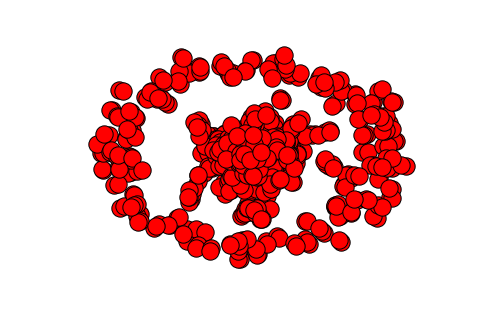

In [13]:
%matplotlib inline

# draw the graph
nx.draw(G)

The resulting network plot shows an inner circle of authors surrounded by an outer ring of unconnected authors.  Let's get some basic information about the network

In [17]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 884
Number of edges: 962
Average degree:   2.1765


What's the diamter of the network?  Diameter is the longest of the shortest paths between nodes.  This measure gives a sense of a network's size.

In [18]:
# Calculating the diameter of the graph using the built in NetworkX function.
nx.diameter(G)

NetworkXError: Graph not connected: infinite path length

In [20]:
#If your Graph has more than one component, this will return False:
print(nx.is_connected(G))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G.subgraph(largest_component)
diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

False
('Network diameter of largest component:', 18)


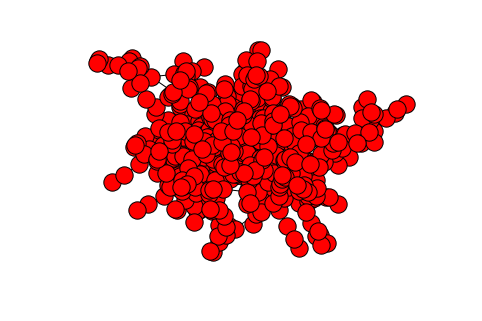

In [21]:
nx.draw(subgraph)

In [23]:
print(nx.info(subgraph))

Name: 
Type: Graph
Number of nodes: 609
Number of edges: 789
Average degree:   2.5911


In [45]:
graphs = sorted(list(nx.connected_component_subgraphs(G)), key = len, reverse=True)

for x in range(len(graphs)):
    
    if nx.diameter(graphs[x]) > 1 :
        print("Index {}:  Nodes = {}; Edges = {}; Diameter = {} ".format(x, 
                                                                        len(nx.nodes(graphs[x])), 
                                                                        len(nx.edges(graphs[x])),
                                                                        nx.diameter(graphs[x])))

Index 0:  Nodes = 609; Edges = 789; Diameter = 18 
Index 1:  Nodes = 7; Edges = 6; Diameter = 4 
Index 2:  Nodes = 7; Edges = 6; Diameter = 4 
Index 3:  Nodes = 6; Edges = 6; Diameter = 3 
Index 4:  Nodes = 5; Edges = 4; Diameter = 4 
Index 5:  Nodes = 5; Edges = 5; Diameter = 3 
Index 6:  Nodes = 5; Edges = 4; Diameter = 3 
Index 7:  Nodes = 5; Edges = 4; Diameter = 4 
Index 8:  Nodes = 4; Edges = 4; Diameter = 3 
Index 9:  Nodes = 4; Edges = 3; Diameter = 2 
Index 10:  Nodes = 4; Edges = 3; Diameter = 2 
Index 11:  Nodes = 4; Edges = 4; Diameter = 3 
Index 12:  Nodes = 3; Edges = 2; Diameter = 2 
Index 13:  Nodes = 3; Edges = 2; Diameter = 2 
Index 14:  Nodes = 3; Edges = 2; Diameter = 2 
Index 15:  Nodes = 3; Edges = 2; Diameter = 2 
Index 16:  Nodes = 3; Edges = 2; Diameter = 2 
Index 17:  Nodes = 3; Edges = 2; Diameter = 2 
Index 18:  Nodes = 3; Edges = 2; Diameter = 2 
Index 19:  Nodes = 3; Edges = 2; Diameter = 2 
Index 20:  Nodes = 3; Edges = 2; Diameter = 2 
Index 21:  Nodes =

### Export the citation network subgraph for visualization in Gephi

In [46]:
# Writing the graph as a GEXF file.
nx.write_gml(subgraph, 'MM_network.gml')

![Gephi](https://raw.githubusercontent.com/kfolsom98/DATA620/master/Assignment3/MM_Network_Subgraph.png)